<a href="https://colab.research.google.com/github/dattt21/BTL_CSDL-PT/blob/main/evaluate_v%C3%A0_test_%E1%BA%A3nh_%C4%91%E1%BA%A7u_v%C3%A0o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#vizualize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import numpy as np
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

In [ ]:

path_dataset = r"/content/drive/MyDrive/data_100"
image_files = [f for f in os.listdir(path_dataset) if os.path.isfile(os.path.join(path_dataset, f))]
print(f"Số lượng tệp ảnh: {len(image_files)}")

Số lượng tệp ảnh: 101


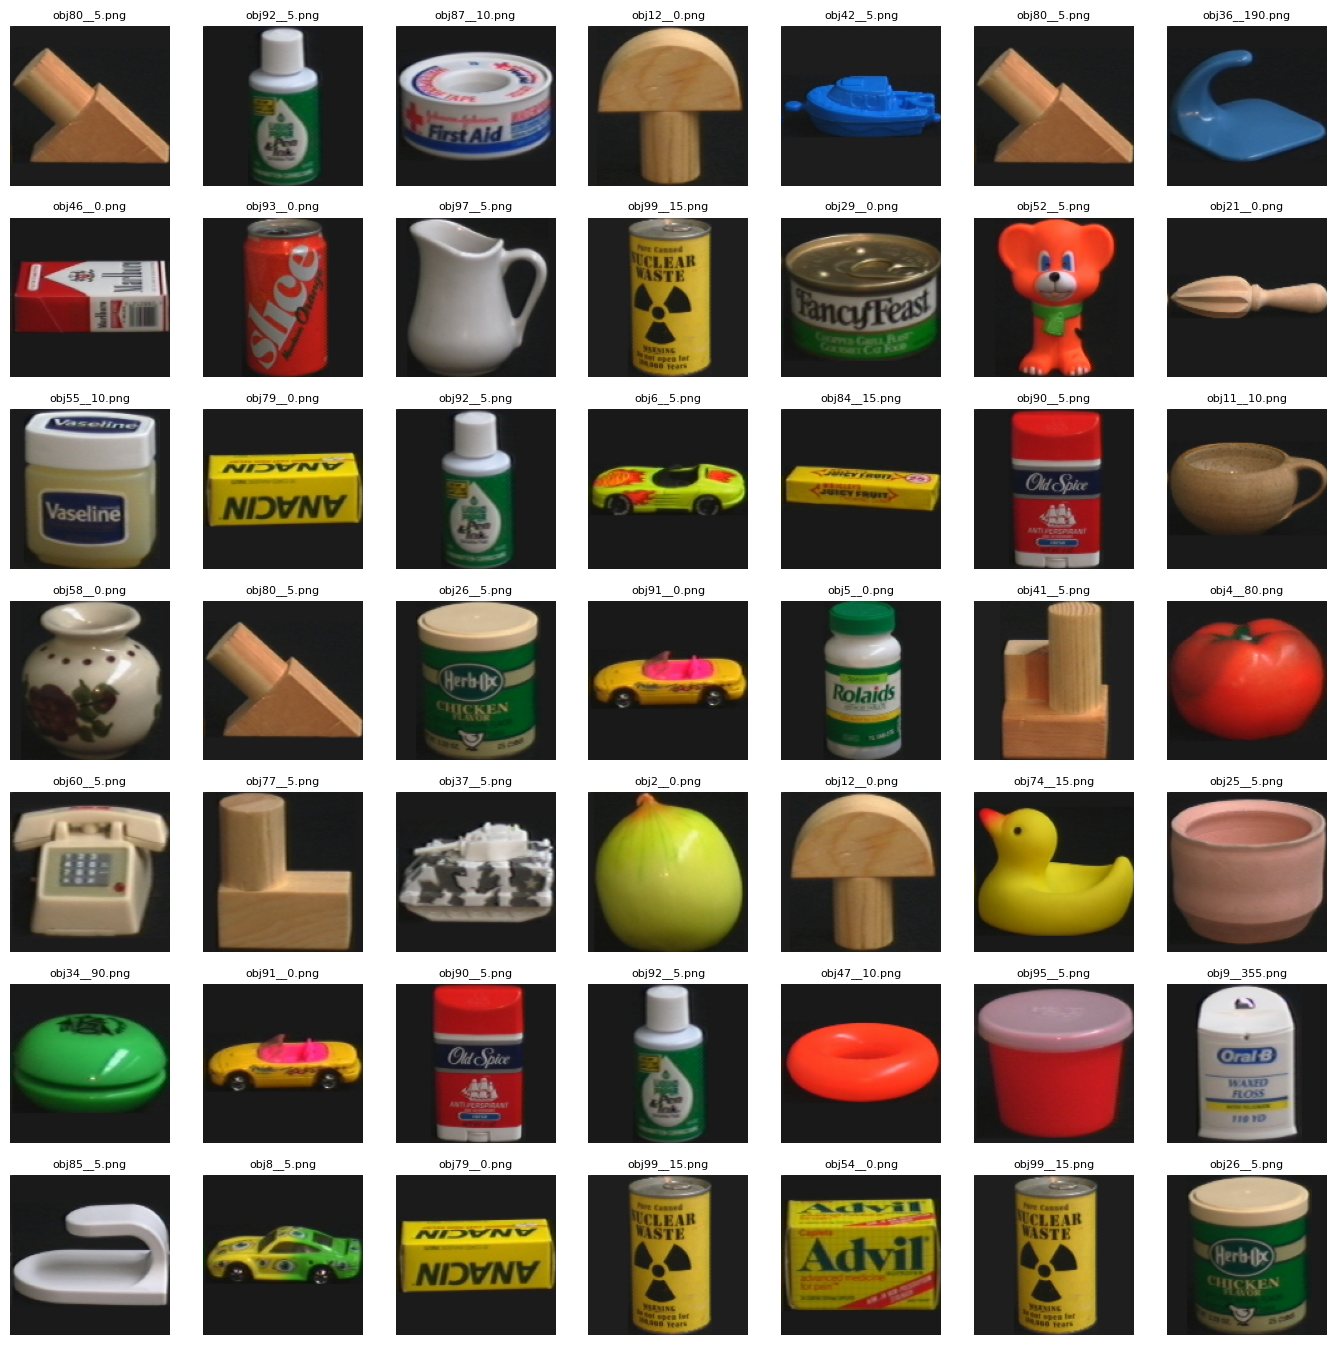

In [ ]:

W = 7
H = 7

# Tạo đối tượng lưới ảnh với kích thước W hàng và H cột
fig, axes = plt.subplots(W, H, figsize=(17, 17))

# Chuyển đổi lưới ảnh từ dạng 2 chiều sang 1 chiều để dễ dàng truy cập
axes = axes.ravel()

# Vòng lặp để duyệt qua từng phần tử trong lưới ảnh
for i in range(W * H):
    # Chọn ngẫu nhiên một tệp ảnh từ danh sách các tệp ảnh
    image_file = random.choice(image_files)

    # Đọc ảnh từ tệp ảnh đã chọn
    img = plt.imread(os.path.join(path_dataset, image_file))

    # Hiển thị ảnh lên ô ảnh thứ i trong lưới
    axes[i].imshow(img)

    # Đặt tiêu đề cho ảnh là tên tệp ảnh (bạn có thể điều chỉnh để lấy nhãn khác nếu cần)
    axes[i].set_title(image_file, fontsize=8)

    # Tắt trục đồ thị để loại bỏ các dấu nhắc trục trong ảnh
    axes[i].axis('off')

# Hiển thị lưới ảnh
plt.show()

# chia train test


# load dữ liệu trích xuất

In [ ]:
path="/content/drive/MyDrive/extract/"
path_obj_data= path+"obj_data.npy"
path_hsv=path+"HSV.npy"
path_hog=path+"HOG.npy"
path_hog_hsv=path+"concat_hog_hsv.npy"



In [ ]:
import numpy as np
# Load the NumPy file
obj_data = np.load(path_obj_data, allow_pickle="True")
data_HSV = np.load(path_hsv ,allow_pickle="True")
data_HOG = np.load(path_hog , allow_pickle="True")
data_HOG_HSV=np.load(path_hog_hsv, allow_pickle="True")



#Class and funtion for test

In [ ]:
import math

def distance_euclidean(x, y):
    if len(x) != len(y):
        return None  # Invalid input
    squared_distance = 0
    for i in range(len(x)):
        squared_distance += (x[i] - y[i]) ** 2
    return squared_distance ** 0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2
from tqdm import tqdm
from skimage import feature

# Hàm chuyển đổi từ RGB sang HSV
def rgb_to_hsv(pixel):
    r, g, b = pixel
    r, g, b = b / 255.0, g / 255.0, r / 255.0
    v = max(r, g, b)
    delta = v - min(r, g, b)
    if delta == 0:
        h = 0
        s = 0
    else:
        s = delta / v
        if r == v:
            h = (g - b) / delta
        elif g == v:
            h = 2 + (b - r) / delta
        else:
            h = 4 + (r - g) / delta
        h = (h / 6) % 1.0
    return [int(h * 180), int(s * 255), int(v * 255)]

# Hàm chuyển đổi ảnh RGB sang HSV
def covert_image_rgb_to_hsv(img):
    hsv_image = []
    for i in img:
        hsv_image2 = []
        for j in i:
            new_color = rgb_to_hsv(j)
            hsv_image2.append(new_color)
        hsv_image.append(hsv_image2)
    hsv_image = np.array(hsv_image)
    return hsv_image

# Hàm tính histogram
def my_calcHist(image, channels, histSize, ranges):
    hist = np.zeros(histSize, dtype=np.int64)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            bin_vals = [image[i, j, c] for c in channels]
            bin_idxs = [(bin_vals[c] - ranges[c][0]) * histSize[c] // (ranges[c][1] - ranges[c][0]) for c in range(len(channels))]
            hist[tuple(bin_idxs)] += 1
    return hist

# Hàm chuyển đổi RGB sang xám
def convert_image_rgb_to_gray(img_rgb, resize="no"):
    h, w, _ = img_rgb.shape
    img_gray = np.zeros((h, w), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            r, g, b = img_rgb[i, j]
            gray_value = int(0.299 * r + 0.587 * g + 0.114 * b)
            img_gray[i, j] = gray_value
    if resize != "no":
        img_gray = cv2.resize(src=img_gray, dsize=(128, 128))
    return np.array(img_gray)



# Hàm trích xuất đặc trưng HOG
def hog_feature(gray_img):
    (hog_feats, hogImage) = feature.hog(gray_img, orientations=9, pixels_per_cell=(8, 8),
                                        cells_per_block=(2, 2), transform_sqrt=True, block_norm="L2",
                                        visualize=True)
    return hog_feats


import math

def distance_euclidean(x, y):
    if len(x) != len(y):
        return None  # Invalid input
    squared_distance = 0
    for i in range(len(x)):
        squared_distance += (x[i] - y[i]) ** 2
    return squared_distance ** 0.5




Top 3 similar images based on Euclidean distance:
Image index: 7, Distance: 0.0
Image index: 54, Distance: 804.0369417443892
Image index: 82, Distance: 1869.8625781413793


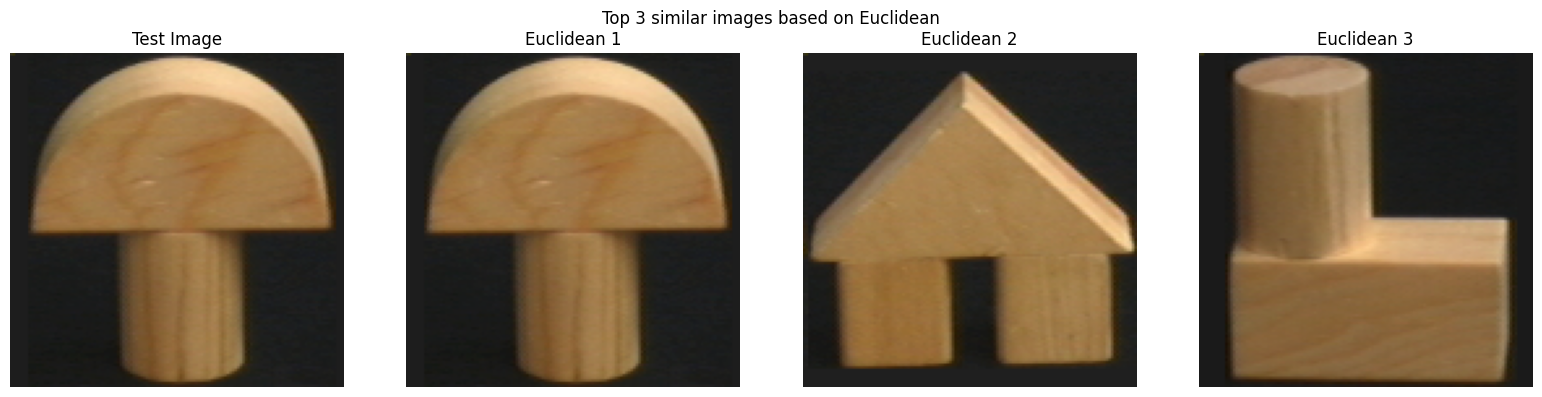

In [ ]:
# Hàm hiển thị ảnh và kết quả
def show_images_with_results(test_image_path, euclidean_distances, obj_data):
    datadir = r"/content/drive/MyDrive/data_100"

    # Lấy đường dẫn của 3 ảnh gần nhất theo Euclidean
    similar_images_euclidean = [
         (os.path.join(datadir, image_files[idx]), obj_data[idx][1]) for idx, _ in euclidean_distances[:3]
    ]

    # Hiển thị các ảnh và kết quả
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))
    fig.suptitle("Top 3 similar images based on Euclidean")

    # Hiển thị ảnh test
    test_img = Image.open(test_image_path)
    axes[0].imshow(np.array(test_img))
    axes[0].set_title("Test Image")
    axes[0].axis('off')

    # Hiển thị các ảnh giống nhất dựa trên khoảng cách Euclidean
    for i, (img_path, _) in enumerate(similar_images_euclidean):
        img = Image.open(img_path)
        axes[i + 1].imshow(np.array(img))
        axes[i + 1].set_title(f"Euclidean {i + 1}")
        axes[i + 1].axis('off')

    plt.tight_layout()
    plt.show()

# Hàm trích xuất đặc trưng từ ảnh test
def extract_features_from_test_image(test_image_path):
    img = cv2.imread(test_image_path)
    img = cv2.resize(img, (128, 128))

    # Trích xuất đặc trưng HSV
    bins = [8, 12, 3]
    ranges = [[0, 180], [0, 256], [0, 256]]
    img_hsv = covert_image_rgb_to_hsv(img)
    hist_my = my_calcHist(img_hsv, [0, 1, 2], bins, ranges)
    embedding_hsv = hist_my.flatten()
    embedding_hsv[0] = 0

    # Trích xuất đặc trưng HOG
    img_gray = convert_image_rgb_to_gray(img, resize="yes")
    embedding_hog = hog_feature(img_gray)

    # Kết hợp các đặc trưng
    embedding = np.concatenate([embedding_hsv, embedding_hog])
    return embedding

# Chọn ảnh test và tính khoảng cách
test_image_path = "/content/drive/MyDrive/data_100/obj12__0.png"
test_sample = extract_features_from_test_image(test_image_path)

# Tính khoảng cách Euclidean
euclidean_distances = []
for i, data in enumerate(data_HOG_HSV):
    dist = distance_euclidean(test_sample, data[1])
    euclidean_distances.append((i, dist))

# Sắp xếp kết quả theo khoảng cách Euclidean tăng dần
euclidean_distances = sorted(euclidean_distances, key=lambda x: x[1])

print("Top 3 similar images based on Euclidean distance:")
for idx, dist in euclidean_distances[:3]:
    print(f"Image index: {idx}, Distance: {dist}")

# Hiển thị kết quả
show_images_with_results(test_image_path, euclidean_distances, obj_data)